In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import matplotlib.ticker as mtick
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths

In [2]:
def one_hot_encode_sequence(seq, nucleotides="ACGT"):
    mapping = {nucleotide: np.eye(len(nucleotides))[i] for i, nucleotide in enumerate(nucleotides)}
    return np.array([mapping.get(nuc, [0, 0, 0, 0]) for nuc in seq])

def one_hot_encode_df_column(df, column_name):
    one_hot_encoded = df[column_name].apply(lambda seq: one_hot_encode_sequence(seq))
    df['A'] = one_hot_encoded.apply(lambda x: ','.join(map(str, x[:, 0].astype(int).tolist())))
    df['C'] = one_hot_encoded.apply(lambda x: ','.join(map(str, x[:, 1].astype(int).tolist())))
    df['G'] = one_hot_encoded.apply(lambda x: ','.join(map(str, x[:, 2].astype(int).tolist())))
    df['T'] = one_hot_encoded.apply(lambda x: ','.join(map(str, x[:, 3].astype(int).tolist())))

    return df

In [3]:
def one_hot_encode_triplet_sequence(seq, nucleotides="ACGT"):
    triplet_combinations = [a + b + c for a in nucleotides for b in nucleotides for c in nucleotides]
    triplet_mapping = {triplet: np.eye(len(triplet_combinations))[i] for i, triplet in enumerate(triplet_combinations)}
    
    triplets = [seq[i:i+3] for i in range(len(seq) - 2)]

    return np.array([triplet_mapping.get(triplet, np.zeros(len(nucleotides)**3)) for triplet in triplets])

def one_hot_encode_df_triplets(df, column_name):
    one_hot_encoded = df[column_name].apply(lambda seq: one_hot_encode_triplet_sequence(seq))
    
    triplet_combinations = [a + b + c for a in "ACGT" for b in "ACGT" for c in "ACGT"]
    
    for i, triplet in enumerate(triplet_combinations):
        df[f"Triplet_{triplet}"] = one_hot_encoded.apply(lambda x: ','.join(map(str, x[:, i].astype(int).tolist())))
    
    return df

In [4]:
naive_transcripts = pd.read_csv('Data/machine_learning_input_prep/all_expressed_transcripts_with_fasta_naive:clip_collapsed.bed', sep="\t")
naive_transcripts = one_hot_encode_df_column(naive_transcripts, 'sequence')
naive_transcripts =  one_hot_encode_df_triplets(naive_transcripts, 'sequence')
pd.set_option('display.max_columns', None)
naive_transcripts.head()

,gene_id,transcript_id,strand,gene_name,feature_length,sequence,global_iclip,sequence_length,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,A,C,G,T
0,ENSMUSG00000000001.5,ENSMUST00000000001.5,-,Gnai3,259,CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...,"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3262,False,False,False,False,False,False,31.163420,30.960366,16.155487,1370.666667,2922.000000,740.140667,"0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...","1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,...","0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,..."
1,ENSMUSG00000020875.10,ENSMUST00000000010.9,+,Hoxb9,602,GGTCCGTGTGCCACCTTTTCCCTGCTTGGGCGCCGCGGCGCGAGCG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2574,False,False,False,False,False,False,0.041456,0.037552,0.476991,1.333333,2.666667,14.666667,"0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,...","1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,..."
2,ENSMUSG00000000028.16,ENSMUST00000000028.14,-,Cdc45,169,TGGAAACACATTCAAATAATGTGTGACTGAATTTACTTTATGTCTA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2143,False,False,False,False,False,False,13.999242,16.831587,21.890544,349.666333,871.333000,575.334000,"0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,...","0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...","1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,..."
3,ENSMUSG00000000078.8,ENSMUST00000000080.8,+,Klf6,361,GAGGGGGGAGGCTGGCAGCGGAGCTTTGAATAGGGAAGTTTTGCAG...,"0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...",4225,False,False,False,False,False,True,23.747248,24.678761,9.409482,1257.667000,2633.333333,490.929333,"0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...","1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,...","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,..."
4,ENSMUSG00000000088.8,ENSMUST00000000090.8,+,Cox5a,137,CTCACACCGGCTTCTCGTCAGCCTCAGCCAGTGCGCTGTGGTCGCC...,"9,1,3,1,3,5,0,0,2,1,3,7,2,4,8,3,20,7,3,0,1,0,3...",645,False,False,False,False,False,False,39.196652,48.808133,119.122907,238.666667,619.997000,758.655667,"0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...","1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,...","0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...","0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,..."


In [5]:
feature_lengths = pd.read_csv('genomes/genome_m39/gencode.vM27.annotation_with_feature_lengths.tsv', sep="\t")
feature_lengths = feature_lengths[["transcript_id", "cds_length",	"3utr_length",	"5utr_length"]]
naive_transcripts_with_lengths = pd.merge(naive_transcripts, feature_lengths, on="transcript_id", how="left")
naive_transcripts_with_lengths

,gene_id,transcript_id,strand,gene_name,feature_length,sequence,global_iclip,sequence_length,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,A,C,G,T,cds_length,3utr_length,5utr_length
0,ENSMUSG00000000001.5,ENSMUST00000000001.5,-,Gnai3,259,CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...,"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3262,False,False,False,False,False,False,31.163420,30.960366,16.155487,1370.666667,2922.000000,740.140667,"0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...","1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,...","0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,...",1062.0,2059.0,141.0
1,ENSMUSG00000020875.10,ENSMUST00000000010.9,+,Hoxb9,602,GGTCCGTGTGCCACCTTTTCCCTGCTTGGGCGCCGCGGCGCGAGCG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2574,False,False,False,False,False,False,0.041456,0.037552,0.476991,1.333333,2.666667,14.666667,"0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,...","1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,...",750.0,1739.0,85.0
2,ENSMUSG00000000028.16,ENSMUST00000000028.14,-,Cdc45,169,TGGAAACACATTCAAATAATGTGTGACTGAATTTACTTTATGTCTA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2143,False,False,False,False,False,False,13.999242,16.831587,21.890544,349.666333,871.333000,575.334000,"0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,...","0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...","1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,...",1698.0,132.0,313.0
3,ENSMUSG00000000078.8,ENSMUST00000000080.8,+,Klf6,361,GAGGGGGGAGGCTGGCAGCGGAGCTTTGAATAGGGAAGTTTTGCAG...,"0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...",4225,False,False,False,False,False,True,23.747248,24.678761,9.409482,1257.667000,2633.333333,490.929333,"0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...","1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,...","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...",954.0,3114.0,157.0
4,ENSMUSG00000000088.8,ENSMUST00000000090.8,+,Cox5a,137,CTCACACCGGCTTCTCGTCAGCCTCAGCCAGTGCGCTGTGGTCGCC...,"9,1,3,1,3,5,0,0,2,1,3,7,2,4,8,3,20,7,3,0,1,0,3...",645,False,False,False,False,False,False,39.196652,48.808133,119.122907,238.666667,619.997000,758.655667,"0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...","1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,...","0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...","0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,...",438.0,158.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13671,ENSMUSG00002076601.1,ENSMUST00020183435.1,-,Scarna13,275,AATCTGCAGTCTTGGCCCTGCGCTGGGTTAGCGGTACCCTAGAGCA...,"90,32,4,2,1,0,0,0,1,0,5,2,0,0,1,3,2,1,2,0,0,1,...",275,False,False,False,False,False,False,1629.746957,1992.710330,2342.799703,771.333333,1895.333000,1172.666667,"1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,...","0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...","0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,...",NaN,NaN,NaN
13672,ENSMUSG00002074853.1,ENSMUST00020183439.1,+,ENSMUSG00002074853,140,AATGGAAGCTGCGGAGTCAACCATGCAGACAAATGAGAAGCTGTCT...,"40,1,1,2,3,1,0,0,0,0,1,0,0,2,2,19,9,3,2,1,0,2,...",140,False,False,False,False,False,False,342.324805,176.782626,136.151726,26.333333,25.333333,10.000000,"1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,...","0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,...","0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,...","0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...",NaN,NaN,NaN
13673,ENSMUSG00002076451.1,ENSMUST00020183515.1,+,ENSMUSG00002076451,70,CCCGGGAGCGGGGGACCACCAGGTTGCCTAAGGAGGGGTGAACCGG...,"0,0

In [6]:
clusters = pd.read_csv('Results/machine_learning_results/cluster_assignment_file/sequence:global_iclip:paris_intramol:postar3_joined_clusters.tsv', sep="\t")
naive_transcripts_with_lengths_and_clusters = pd.merge(naive_transcripts_with_lengths, clusters, on="transcript_id", how="outer")
naive_transcripts_with_lengths_and_clusters

,gene_id,transcript_id,strand,gene_name,feature_length,sequence,global_iclip,sequence_length,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,A,C,G,T,cds_length,3utr_length,5utr_length,Cluster
0,ENSMUSG00000000001.5,ENSMUST00000000001.5,-,Gnai3,259.0,CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...,"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3262.0,False,False,False,False,False,False,31.163420,30.960366,16.155487,1370.666667,2922.000000,740.140667,"0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...","1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,...","0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,...",1062.0,2059.0,141.0,NaN
1,ENSMUSG00000020875.10,ENSMUST00000000010.9,+,Hoxb9,602.0,GGTCCGTGTGCCACCTTTTCCCTGCTTGGGCGCCGCGGCGCGAGCG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2574.0,False,False,False,False,False,False,0.041456,0.037552,0.476991,1.333333,2.666667,14.666667,"0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,...","1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,...",750.0,1739.0,85.0,NaN
2,ENSMUSG00000000028.16,ENSMUST00000000028.14,-,Cdc45,169.0,TGGAAACACATTCAAATAATGTGTGACTGAATTTACTTTATGTCTA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2143.0,False,False,False,False,False,False,13.999242,16.831587,21.890544,349.666333,871.333000,575.334000,"0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,...","0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...","1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,...",1698.0,132.0,313.0,NaN
3,ENSMUSG00000000078.8,ENSMUST00000000080.8,+,Klf6,361.0,GAGGGGGGAGGCTGGCAGCGGAGCTTTGAATAGGGAAGTTTTGCAG...,"0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...",4225.0,False,False,False,False,False,True,23.747248,24.678761,9.409482,1257.667000,2633.333333,490.929333,"0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...","1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,...","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...",954.0,3114.0,157.0,NaN
4,ENSMUSG00000000088.8,ENSMUST00000000090.8,+,Cox5a,137.0,CTCACACCGGCTTCTCGTCAGCCTCAGCCAGTGCGCTGTGGTCGCC...,"9,1,3,1,3,5,0,0,2,1,3,7,2,4,8,3,20,7,3,0,1,0,3...",645.0,False,False,False,False,False,False,39.196652,48.808133,119.122907,238.666667,619.997000,758.655667,"0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...","1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,...","0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...","0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,...",438.0,158.0,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13681,ENSMUSG00002076601.1,ENSMUST00020183435.1,-,Scarna13,275.0,AATCTGCAGTCTTGGCCCTGCGCTGGGTTAGCGGTACCCTAGAGCA...,"90,32,4,2,1,0,0,0,1,0,5,2,0,0,1,3,2,1,2,0,0,1,...",275.0,False,False,False,False,False,False,1629.746957,1992.710330,2342.799703,771.333333,1895.333000,1172.666667,"1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,...","0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...","0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,...",NaN,NaN,NaN,NaN
13682,ENSMUSG00002074853.1,ENSMUST00020183439.1,+,ENSMUSG00002074853,140.0,AATGGAAGCTGCGGAGTCAACCATGCAGACAAATGAGAAGCTGTCT...,"40,1,1,2,3,1,0,0,0,0,1,0,0,2,2,19,9,3,2,1,0,2,...",140.0,False,False,False,False,False,False,342.324805,176.782626,136.151726,26.333333,25.333333,10.000000,"1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,...","0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,...","0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,...","0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN
13683,ENSMUSG00002076451.1,ENSMUST00020183515.1,+,ENSMUSG0

In [7]:
transcript_data = []

with open('genomes/genome_m39/gencode.vM27.chr_patch_hapl_scaff.annotation.gtf', 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue

        columns = line.strip().split('\t')
        attributes = columns[8]

        if 'transcript_id' in attributes:
            gene_name = [field for field in attributes.split(';') if 'gene_name' in field][0]
            gene_name = gene_name.split('"')[1]
            gene_id = [field for field in attributes.split(';') if 'gene_id' in field][0]
            gene_id = gene_id.split('"')[1]
            transcript_id = [field for field in attributes.split(';') if 'transcript_id' in field][0]
            transcript_id = transcript_id.split('"')[1]
            gene_type = [field for field in attributes.split(';') if 'gene_type' in field][0]
            gene_type = gene_type.split('"')[1]

            transcript_data.append(columns[:7] + [gene_id] + [gene_name] + [transcript_id] + [gene_type])

column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', "strand", "gene_id", "gene_name", 'transcript_id', 'gene_type']

annotation = pd.DataFrame(transcript_data, columns=column_names)
annotation['start'] = annotation['start'].astype(int) - 1
annotation = annotation[annotation['feature'] == 'transcript']
annotation = annotation[["transcript_id", "gene_type"]]
annotation

,transcript_id,gene_type
0,ENSMUST00000193812.2,TEC
2,ENSMUST00000082908.3,snRNA
4,ENSMUST00000162897.2,protein_coding
7,ENSMUST00000159265.2,protein_coding
10,ENSMUST00000070533.5,protein_coding
...,...,...
1814209,ENSMUST00000180208.2,protein_coding
1814219,ENSMUST00000178327.2,protein_coding
1814229,ENSMUST00000178569.2,protein_coding
1814233,ENSMUST00000179505.8,protein_coding


In [8]:
naive_transcripts_with_lengths_and_clusters = pd.merge(naive_transcripts_with_lengths_and_clusters, annotation, on="transcript_id", how="left")
naive_transcripts_with_lengths_and_clusters

,gene_id,transcript_id,strand,gene_name,feature_length,sequence,global_iclip,sequence_length,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,A,C,G,T,cds_length,3utr_length,5utr_length,Cluster,gene_type
0,ENSMUSG00000000001.5,ENSMUST00000000001.5,-,Gnai3,259.0,CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...,"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3262.0,False,False,False,False,False,False,31.163420,30.960366,16.155487,1370.666667,2922.000000,740.140667,"0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...","1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,...","0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,...",1062.0,2059.0,141.0,NaN,protein_coding
1,ENSMUSG00000020875.10,ENSMUST00000000010.9,+,Hoxb9,602.0,GGTCCGTGTGCCACCTTTTCCCTGCTTGGGCGCCGCGGCGCGAGCG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2574.0,False,False,False,False,False,False,0.041456,0.037552,0.476991,1.333333,2.666667,14.666667,"0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,...","1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,...",750.0,1739.0,85.0,NaN,protein_coding
2,ENSMUSG00000000028.16,ENSMUST00000000028.14,-,Cdc45,169.0,TGGAAACACATTCAAATAATGTGTGACTGAATTTACTTTATGTCTA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2143.0,False,False,False,False,False,False,13.999242,16.831587,21.890544,349.666333,871.333000,575.334000,"0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,...","0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...","0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...","1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,...",1698.0,132.0,313.0,NaN,protein_coding
3,ENSMUSG00000000078.8,ENSMUST00000000080.8,+,Klf6,361.0,GAGGGGGGAGGCTGGCAGCGGAGCTTTGAATAGGGAAGTTTTGCAG...,"0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...",4225.0,False,False,False,False,False,True,23.747248,24.678761,9.409482,1257.667000,2633.333333,490.929333,"0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...","1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,...","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...",954.0,3114.0,157.0,NaN,protein_coding
4,ENSMUSG00000000088.8,ENSMUST00000000090.8,+,Cox5a,137.0,CTCACACCGGCTTCTCGTCAGCCTCAGCCAGTGCGCTGTGGTCGCC...,"9,1,3,1,3,5,0,0,2,1,3,7,2,4,8,3,20,7,3,0,1,0,3...",645.0,False,False,False,False,False,False,39.196652,48.808133,119.122907,238.666667,619.997000,758.655667,"0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...","1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,...","0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...","0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,...",438.0,158.0,49.0,NaN,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13681,ENSMUSG00002076601.1,ENSMUST00020183435.1,-,Scarna13,275.0,AATCTGCAGTCTTGGCCCTGCGCTGGGTTAGCGGTACCCTAGAGCA...,"90,32,4,2,1,0,0,0,1,0,5,2,0,0,1,3,2,1,2,0,0,1,...",275.0,False,False,False,False,False,False,1629.746957,1992.710330,2342.799703,771.333333,1895.333000,1172.666667,"1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,...","0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...","0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,...",NaN,NaN,NaN,NaN,scaRNA
13682,ENSMUSG00002074853.1,ENSMUST00020183439.1,+,ENSMUSG00002074853,140.0,AATGGAAGCTGCGGAGTCAACCATGCAGACAAATGAGAAGCTGTCT...,"40,1,1,2,3,1,0,0,0,0,1,0,0,2,2,19,9,3,2,1,0,2,...",140.0,False,False,False,False,False,False,342.324805,176.782626,136.151726,26.333333,25.333333,10.000000,"1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,...","0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,...","0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,...","0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

Y-axis limits: 0.0 to 0.03537947809465883


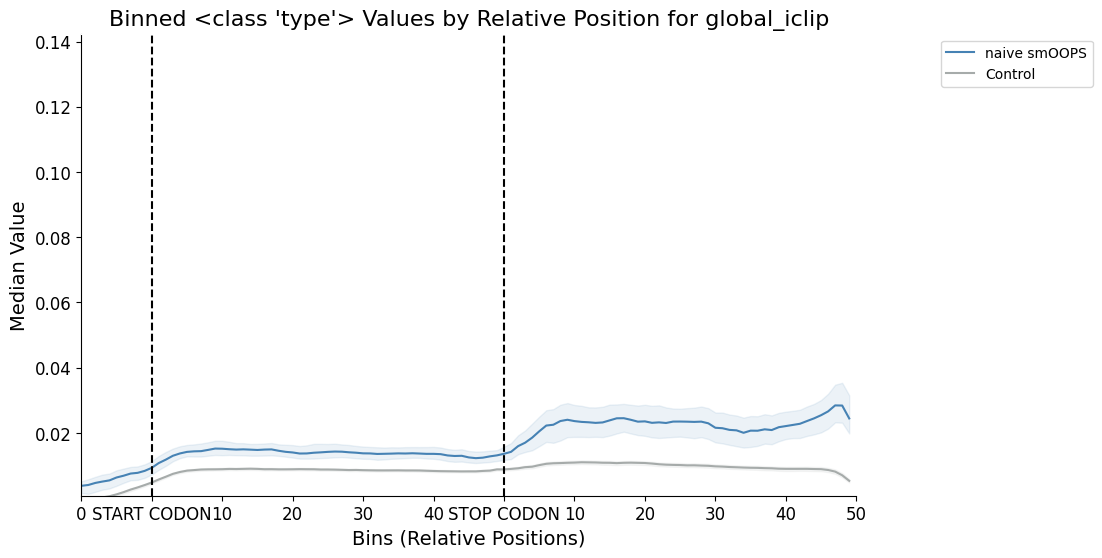

Y-axis limits: 0.0 to 0.24517005921817953


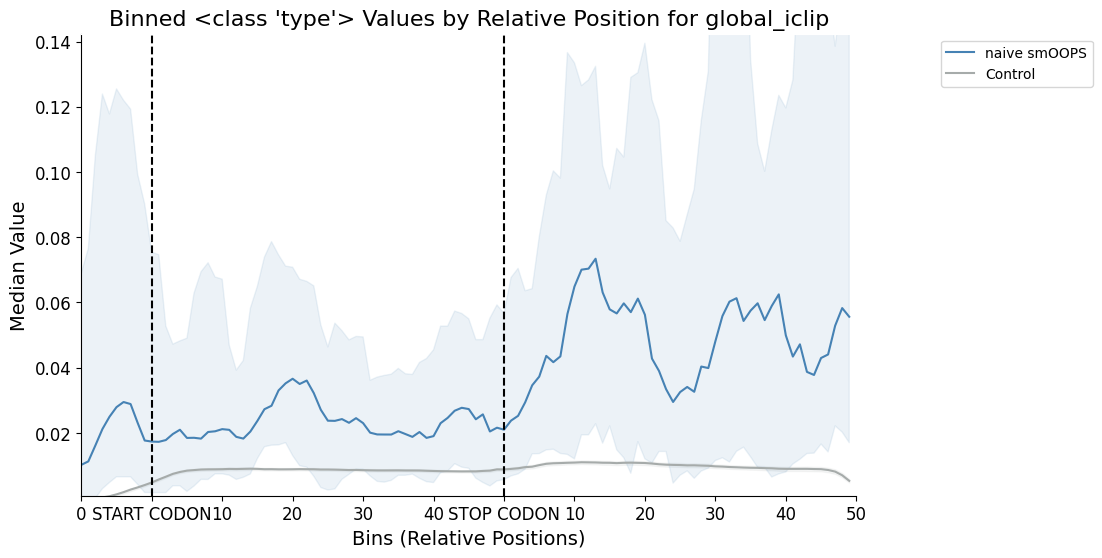

In [9]:
def bootstrap_ci(series, n_boot=1000, ci=95, type="mean"):

    bootstrapped_medians = []
    for _ in range(n_boot):
        sample = np.random.choice(series, size=len(series), replace=True)
        if type == "mean":
            bootstrapped_medians.append(np.mean(sample))
        elif type == "median":
            bootstrapped_medians.append(np.median(sample))
        else:
            raise ValueError("type must be either 'mean' or 'median'")
    
    lower_bound = np.percentile(bootstrapped_medians, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_medians, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

def plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, col, type="mean"):

    grouped = binned_df_melted.groupby(['smoops_naive', 'bin'])['value']
    
    if type == "mean":
        mean = grouped.mean()
    else:
        mean = grouped.median()
    
    ci_lower = grouped.apply(lambda x: bootstrap_ci(x, type=type)[0])
    ci_upper = grouped.apply(lambda x: bootstrap_ci(x, type=type)[1])

    summary_df = mean.reset_index(name='mean')
    summary_df['ci_lower'] = ci_lower.values 
    summary_df['ci_upper'] = ci_upper.values
    for value in ['mean', 'ci_lower', 'ci_upper']:
        summary_df_1 = summary_df[summary_df['smoops_naive'] == True].sort_values('bin')
        summary_df_0 = summary_df[summary_df['smoops_naive'] == False].sort_values('bin')

        summary_df_1[value] = summary_df_1[value].rolling(window=5, min_periods=1).mean()
        summary_df_0[value] = summary_df_0[value].rolling(window=5, min_periods=1).mean()

        summary_df = pd.concat([summary_df_1, summary_df_0]).sort_values('bin')

    return summary_df

def plot_with_ci(summary_df, num_bins_per_part, col, type="mean"):

    summary_df['smoops_naive'] = summary_df['smoops_naive'].replace({True: 'naive smOOPS', False: 'Control'})
    
    plt.figure(figsize=(10, 6))
    palette = ['#4682B4', '#A6ABAA']
    sns.lineplot(data=summary_df, x='bin', y='mean', hue='smoops_naive', errorbar=None, palette=palette)

    for key, grp in summary_df.groupby('smoops_naive'):
        plt.fill_between(grp['bin'], grp['ci_lower'], grp['ci_upper'], alpha=0.1, color='#4682B4' if key=="naive smOOPS" else '#A6ABAA')

    plt.title(f'Binned {type} Values by Relative Position for {col}', fontsize=16)
    plt.xlabel('Bins (Relative Positions)', fontsize=14)
    plt.ylabel('Median Value', fontsize=14)
    plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')   
    plt.axvline(x=num_bins_per_part[0], color='black', linestyle='--')
    plt.axvline(x=num_bins_per_part[0]+num_bins_per_part[1], color='black', linestyle='--')
    all_tick_labels = ['0', 'START CODON',  '10', '20', '30', '40', 'STOP CODON', '10', '20', '30', '40', '50']
    tick_positions = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
    plt.xticks(ticks=tick_positions, labels=all_tick_labels, fontsize=12, rotation=0, ha='center')
    
    plt.grid(False)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['top'].set_color('white')

    plt.yticks(fontsize=12)
    plt.xlim(0, sum(num_bins_per_part))
    
    print(f"Y-axis limits: {summary_df['ci_lower'].min()} to {summary_df['ci_upper'].max()}")
    plt.ylim(0.000759924245414499, 0.14239746352119315)
    plt.show()


def process_and_plot(df, col, num_bins_per_part, p_value=0.01):

    binned_data = []

    for index, row in df.iterrows():

        value_str = row[col]

        value_list = list(map(float, value_str.strip().split(',')))

        columns_to_normalise = ['global_iclip', 'm6a', 'paris_intramol', 'paris_intergroup', 'paris_intragroup']
        if col in columns_to_normalise:
            value_list = [x / row['semi_naive_mean_tpm'] for x in value_list]

        len_5prime = int(row['5utr_length'])
        len_cds = int(row['cds_length'])
        len_3prime = int(row['3utr_length'])

        value_list_5prime = value_list[0:len_5prime]
        value_list_cds = value_list[len_5prime:-len_3prime]
        value_list_3prime = value_list[-len_3prime:]

        bin_averages_all = []

        value_parts = [value_list_5prime, value_list_cds, value_list_3prime]

        for value_list_region, num_bins in zip(value_parts, num_bins_per_part):

            values = np.array(value_list_region)
            values_split = np.array_split(values, num_bins)
            bin_averages_region = [np.mean(x) if len(x) > 0 else 0 for x in values_split]

            bin_averages_all.append(bin_averages_region)

        bin_averages = np.concatenate(bin_averages_all) 
        binned_data.append({
            'bins': bin_averages,
            'smoops_naive': row['smoops_naive']
        })

    data_for_df = []
    for item in binned_data:
        bins = item['bins']
        smoops_naive = item['smoops_naive']
        bin_dict = {'bin_' + str(i): bins[i] for i in range(sum(num_bins_per_part))}
        bin_dict['smoops_naive'] = smoops_naive
        data_for_df.append(bin_dict)

    binned_df = pd.DataFrame(data_for_df)

    binned_df_melted = binned_df.melt(
        id_vars='smoops_naive', var_name='bin', value_name='value'
    )
    binned_df_melted['bin'] = binned_df_melted['bin'].str.replace('bin_', '').astype(int)

    summary_df = plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins_per_part, "value", type="median")
    plot_with_ci(summary_df, num_bins_per_part, col, type=type)
    
def plot_bins(df, num_bins_per_part):

    df = df[(df['5utr_length'] >= num_bins_per_part[0]) & (df['cds_length'] >= num_bins_per_part[1]) & (df['3utr_length'] >= num_bins_per_part[2])]

    col = "global_iclip"

    process_and_plot(df, col, num_bins_per_part, p_value=0.05)

naive_transcripts_with_lengths_for_plot = naive_transcripts_with_lengths_and_clusters[naive_transcripts_with_lengths_and_clusters["Cluster"] != 1]
plot_bins(naive_transcripts_with_lengths_for_plot.dropna(subset=["cds_length",	"3utr_length",	"5utr_length"]), [10, 50, 50])

naive_transcripts_with_lengths_for_plot = naive_transcripts_with_lengths_and_clusters[naive_transcripts_with_lengths_and_clusters["Cluster"] != 0]
plot_bins(naive_transcripts_with_lengths_for_plot.dropna(subset=["cds_length",	"3utr_length",	"5utr_length"]), [10, 50, 50])

In [33]:
def plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, col):
    grouped = binned_df_melted.groupby(['smoops_naive', 'bin'])['value']
    
    mean = grouped.mean()
    
    summary_df = mean.reset_index(name='mean')

    return summary_df

def process_and_plot(df, col, num_bins_per_partition=[50], p_value=0.01):

    binned_data = []

    for index, row in df.iterrows():

        value_str = row[col]

        value_list = list(map(float, value_str.strip().split(',')))

        columns_to_normalise = ['global_iclip', 'm6a', 'paris_intramol', 'paris_intergroup', 'paris_intragroup', 'ric_intramol', 'ric_intergroup', 'ric_intragroup']
        if col in columns_to_normalise:
            value_list = [x / row['semi_naive_mean_tpm'] for x in value_list]

        len_5prime = int(row['5utr_length'])
        len_cds = int(row['cds_length'])
        len_3prime = int(row['3utr_length'])

        value_list_5prime = value_list[0:len_5prime]
        value_list_cds = value_list[len_5prime:-len_3prime]
        value_list_3prime = value_list[-len_3prime:]

        bin_averages_all = []

        for i, value_list_region in enumerate([value_list_5prime, value_list_cds, value_list_3prime]):
            length_region = len(value_list_region)

            if length_region == 0:
                bin_averages_region = [0] * num_bins_per_partition[i]
            else:
                values = np.array(value_list_region)
                values_split = np.array_split(values, num_bins_per_partition[i])
                bin_averages_region = [np.mean(x) if len(x) > 0 else 0 for x in values_split]

            bin_averages_all.append(bin_averages_region)

        bin_averages = np.concatenate(bin_averages_all) 
        binned_data.append({
            'bins': bin_averages,
            'smoops_naive': row['smoops_naive']
        })

    data_for_df = []
    for item in binned_data:
        bins = item['bins']
        smoops_naive = item['smoops_naive']
        bin_dict = {'bin_' + str(i): bins[i] for i in range(sum(num_bins_per_partition))}
        bin_dict['smoops_naive'] = smoops_naive
        data_for_df.append(bin_dict)

    binned_df = pd.DataFrame(data_for_df)

    binned_df_melted = binned_df.melt(
        id_vars='smoops_naive', var_name='bin', value_name='value'
    )
    binned_df_melted['bin'] = binned_df_melted['bin'].str.replace('bin_', '').astype(int)

    summary_df = plot_create_data_for_plotting_with_ci(binned_df_melted, sum(num_bins_per_partition), "value")
    
    return summary_df
         
def plot_bins(df, columns, num_bins_per_partition=[10,50,50]):

    df = df[(df['5utr_length'] >= num_bins_per_partition[0]) & (df['cds_length'] >= num_bins_per_partition[1]) & (df['3utr_length'] >= num_bins_per_partition[2])]

    for i, col in enumerate(columns):        
        summary_df = process_and_plot(df, col, num_bins_per_partition=num_bins_per_partition, p_value=0.05)
        summary_df["column"] = col
        if i == 0:
            summary_df_all = summary_df
        else:
            summary_df_all = pd.concat([summary_df_all, summary_df])
    return summary_df_all

naive_transcripts_with_lengths_for_plot = naive_transcripts_with_lengths_and_clusters[naive_transcripts_with_lengths_and_clusters["Cluster"] != 1]

nucleotides_list = ["A", "C", "G", "T"]
summary_df_nucleotides = plot_bins(naive_transcripts_with_lengths_for_plot.dropna(subset=["cds_length",	"3utr_length",	"5utr_length"]), nucleotides_list, num_bins_per_partition=[10, 50, 50])

triplet_columns = [col for col in naive_transcripts_with_lengths_for_plot.columns if 'triplet' in col.lower()]
summary_df_triples = plot_bins(naive_transcripts_with_lengths_for_plot.dropna(subset=["cds_length",	"3utr_length",	"5utr_length"]), triplet_columns, num_bins_per_partition=[1, 1, 1])

In [34]:
def calculate_diff_between_groups(summary_df):
    summary_df['smoops_naive'] = summary_df['smoops_naive'].replace({True: 'naive smOOPS', False: 'Control'})
    summary_df_diff_true = summary_df[summary_df["smoops_naive"] == "naive smOOPS"].copy()
    summary_df_diff_false = summary_df[summary_df["smoops_naive"] == "Control"].copy()
    summary_df_diff = pd.merge(summary_df_diff_true, summary_df_diff_false, on=["bin", "column"], suffixes=('_true', '_false'))
    summary_df_diff["diff"] = summary_df_diff["mean_true"] - summary_df_diff["mean_false"]
    return summary_df_diff

summary_df_nucleotides_diff = calculate_diff_between_groups(summary_df_nucleotides)
summary_df_triples_diff = calculate_diff_between_groups(summary_df_triples)

In [35]:
def process_nucleotides_smoothing(summary_df_diff, nucleotides, value="diff", smooth_window=10):
    processed_dfs = []
    
    for nucleotide in nucleotides:
        summary_df_nucleotide = summary_df_diff[summary_df_diff['column'] == nucleotide].sort_values('bin')

        summary_df_nucleotide[value] = summary_df_nucleotide[value].rolling(window=smooth_window, min_periods=1).mean()

        processed_dfs.append(summary_df_nucleotide)
    
    summary_df_diff_smooth = pd.concat(processed_dfs).sort_values('bin').reset_index(drop=True)
    
    return summary_df_diff_smooth

nucleotides_list = ["A", "C", "G", "T"]
summary_df_nucleotides_diff_smooth = process_nucleotides_smoothing(summary_df_nucleotides_diff, nucleotides_list, value="diff", smooth_window=10)

triplet_columns = [col for col in naive_transcripts_with_lengths_and_clusters.columns if 'triplet' in col.lower()]
summary_df_triples_diff_smooth = process_nucleotides_smoothing(summary_df_triples_diff, triplet_columns, value="diff", smooth_window=1)

Y-axis limits: -0.03029203004142391 to 0.03909469054844375


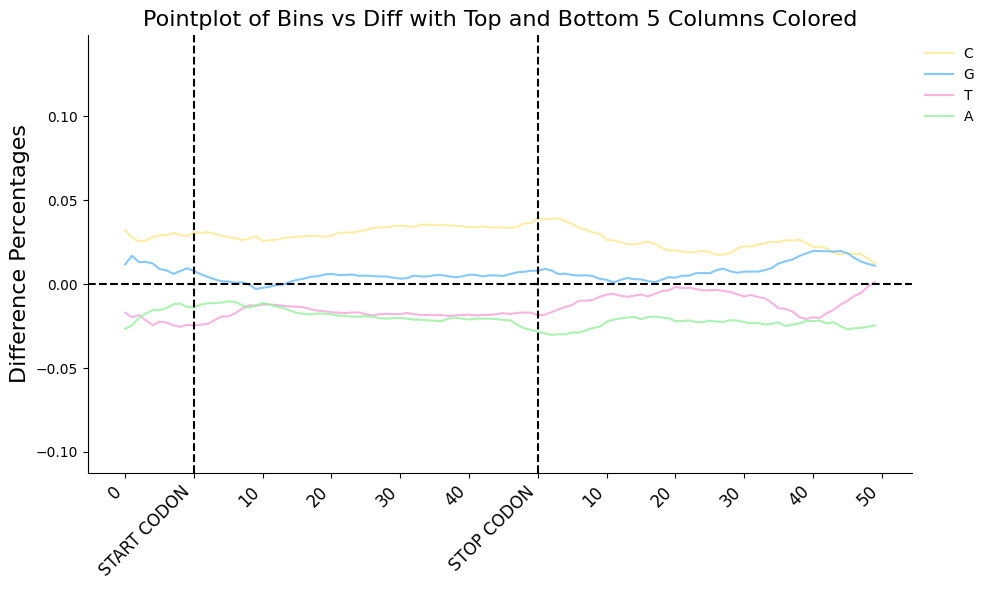

In [36]:

def plot_pointplot_with_top_bottom_colored(df):
    column_diff_means = df.groupby('column')['diff'].mean().sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    for i, col in enumerate(column_diff_means.index.unique()[::-1]):
        data_to_plot = df[df['column'] == col]
        color = 'grey'
        palette = ["#FDE98E","#67BBFC", "#F5A2D9", "#95F19E"]
        color = palette[i]

        sns.lineplot(x='bin', y='diff', data=data_to_plot, color=color, label=col if color != 'grey' else "", errorbar='ci', alpha=0.8 if color != 'grey' else 0.4, linewidth=1.5, markers='o', markersize=0 if color != 'grey' else 0)
    
    all_tick_labels = ['0', 'START CODON',  '10', '20', '30', '40', 'STOP CODON', '10', '20', '30', '40', '50']
    tick_positions = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

    plt.xticks(ticks=tick_positions, labels=all_tick_labels, fontsize=12, rotation=45, ha='right')
    plt.axvline(x=10, color='black', linestyle='--')
    plt.axvline(x=60, color='black', linestyle='--')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    plt.title("Pointplot of Bins vs Diff with Top and Bottom 5 Columns Colored", fontsize=16)
    plt.xlabel("")
    plt.ylabel("Difference Percentages", fontsize=16)

    plt.tight_layout()

    plt.axhline(y=0, color='black', linestyle='--')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['top'].set_color('white')
    print (f"Y-axis limits: {df['diff'].min()} to {df['diff'].max()}")
    plt.ylim(-0.11251999787378336, 0.1487546384610683)
    plt.show()

plot_pointplot_with_top_bottom_colored(summary_df_nucleotides_diff_smooth)

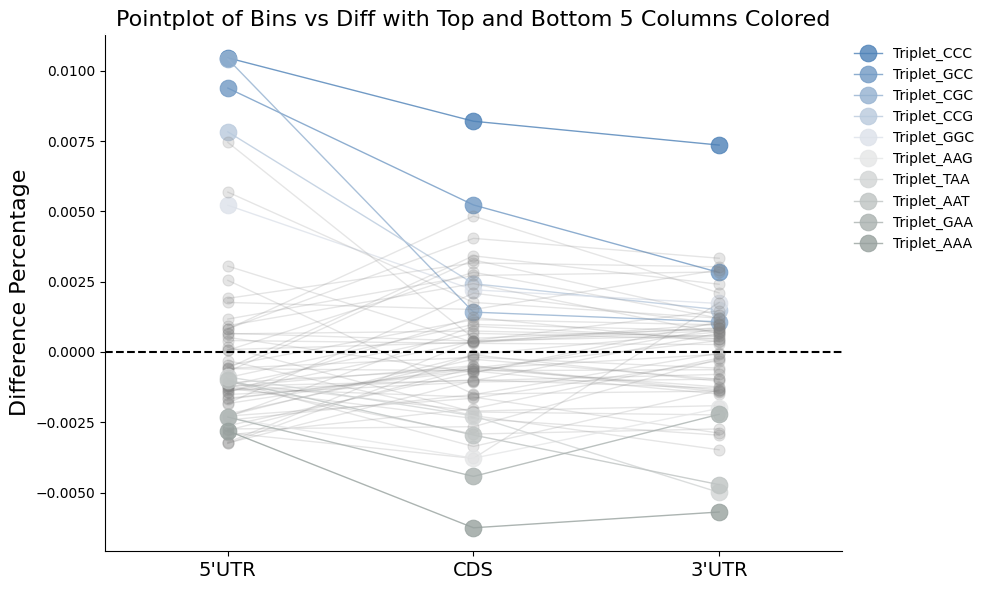

In [24]:
def plot_pointplot_with_top_bottom_colored(df, num_to_color=5):

    column_diff_means = df.groupby('column')['diff'].mean().sort_values(ascending=True)

    top_5_columns = column_diff_means.head(num_to_color).index
    bottom_5_columns = column_diff_means.tail(num_to_color).index

    colors_cmap = ['#97A19E', "#EFEFF0", '#4D81B7']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors_cmap, N=256)

    colors_list = cmap(np.linspace(0, 1, num_to_color*2))

    colors_hex = [mcolors.to_hex(color) for color in colors_list]

    plt.figure(figsize=(10, 6))

    for col in column_diff_means.index.unique()[::-1]:
        data_to_plot = df[df['column'] == col]
        color = 'grey'

        if col in top_5_columns:
            idx = top_5_columns.tolist().index(col)
            color = colors_hex[idx]
        elif col in bottom_5_columns:
            idx = bottom_5_columns.tolist().index(col)
            color = colors_hex[num_to_color + idx]

        sns.pointplot(x='bin', y='diff', data=data_to_plot, dodge=True, color=color, label=col if color != 'grey' else "", errorbar='ci', alpha=0.8 if color != 'grey' else 0.2, linewidth=1, markers='o', markersize=12 if color != 'grey' else 8)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    plt.title("Pointplot of Bins vs Diff with Top and Bottom 5 Columns Colored", fontsize=16)
    plt.xlabel("")
    plt.ylabel("Difference Percentage", fontsize=16)
    plt.xticks(ticks=[0, 1, 2], labels=["5'UTR", "CDS", "3'UTR"], fontsize=14)

    plt.tight_layout()

    plt.axhline(y=0, color='black', linestyle='--')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['top'].set_color('white')

    plt.show()

plot_pointplot_with_top_bottom_colored(summary_df_triples_diff_smooth, 5)

/tmp/ipykernel_1216983/2230390905.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sequence_length"] = df["sequence"].str.len()
/tmp/ipykernel_1216983/2230390905.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=summary_df, x='bin', y='mean', hue='smoops_naive', ci=None, palette=palette)


Y-axis limits: 0.0007544356409785395 to 0.09477571578562971


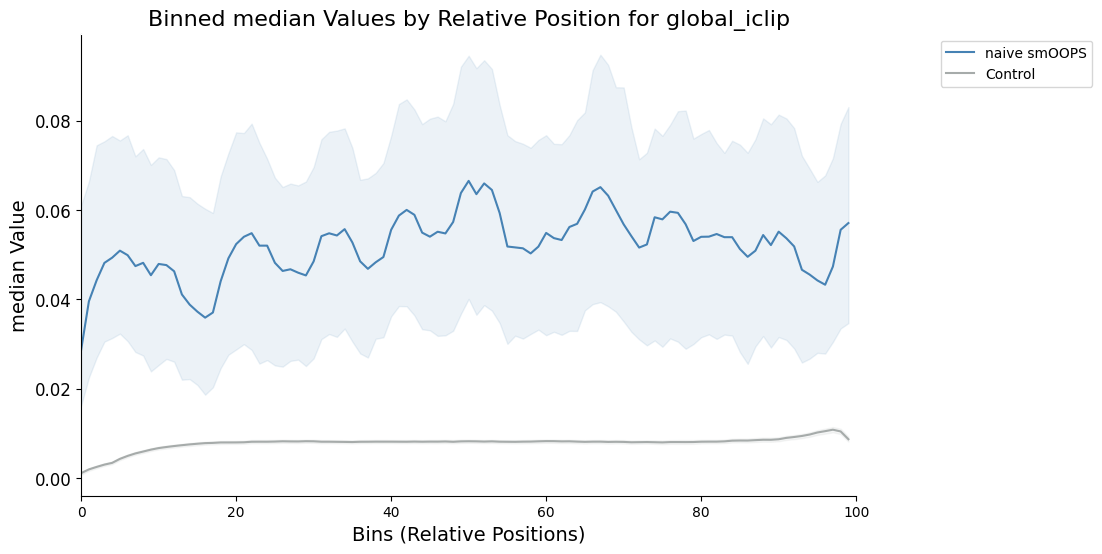

In [11]:
def bootstrap_ci(series, type, n_boot=1000, ci=95):

    bootstrapped_medians = []
    for _ in range(n_boot):
        sample = np.random.choice(series, size=len(series), replace=True)
        if type == "mean":
            bootstrapped_medians.append(np.mean(sample))
        elif type == "median":
            bootstrapped_medians.append(np.median(sample))
        else:
            raise ValueError("type must be either 'mean' or 'median'")

    
    lower_bound = np.percentile(bootstrapped_medians, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_medians, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

def plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, col, type):

    grouped = binned_df_melted.groupby(['smoops_naive', 'bin'])['value']
    if type == "mean":
        mean = grouped.mean()
    else:
        mean = grouped.median()
    
    ci_lower = grouped.apply(lambda x: bootstrap_ci(x, type)[0])
    ci_upper = grouped.apply(lambda x: bootstrap_ci(x, type)[1])

    summary_df = mean.reset_index(name='mean')
    summary_df['ci_lower'] = ci_lower.values 
    summary_df['ci_upper'] = ci_upper.values
    for value in ['mean', 'ci_lower', 'ci_upper']:
        summary_df_1 = summary_df[summary_df['smoops_naive'] == True].sort_values('bin')
        summary_df_0 = summary_df[summary_df['smoops_naive'] == False].sort_values('bin')

        summary_df_1[value] = summary_df_1[value].rolling(window=5, min_periods=1).mean()
        summary_df_0[value] = summary_df_0[value].rolling(window=5, min_periods=1).mean()

        summary_df = pd.concat([summary_df_1, summary_df_0]).sort_values('bin')

    return summary_df

def plot_with_ci(summary_df, num_bins, col, type):

    summary_df['smoops_naive'] = summary_df['smoops_naive'].replace({True: 'naive smOOPS', False: 'Control'})

    plt.figure(figsize=(10, 6))
    palette = ['#4682B4', '#A6ABAA']
    sns.lineplot(data=summary_df, x='bin', y='mean', hue='smoops_naive', ci=None, palette=palette)

    for key, grp in summary_df.groupby('smoops_naive'):
        plt.fill_between(grp['bin'], grp['ci_lower'], grp['ci_upper'], alpha=0.1, color='#4682B4' if key=="naive smOOPS" else '#A6ABAA')

    plt.title(f'Binned {type} Values by Relative Position for {col}', fontsize=16)
    plt.xlabel('Bins (Relative Positions)', fontsize=14)
    plt.ylabel(f'{type} Value', fontsize=14)
    plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')   
    plt.grid(False)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['top'].set_color('white')

    plt.yticks(fontsize=12)
    plt.xlim(0, num_bins)

    print(f"Y-axis limits: {summary_df['ci_lower'].min()} to {summary_df['ci_upper'].max()}")
    plt.show()

def process_and_plot(df, col, num_bins=50, p_value=0.01, type="mean"):

    binned_data = []

    for index, row in df.iterrows():

        value_str = row[col]

        value_list = list(map(float, value_str.strip().split(',')))

        columns_to_normalise = ['global_iclip', 'm6a', 'paris_intramol', 'paris_intergroup', 'paris_intragroup', 'ric_intramol', 'ric_intergroup', 'ric_intragroup']
        if col in columns_to_normalise:
            value_list = [x / row['semi_naive_mean_tpm'] for x in value_list]

        bin_averages_all = []

        length_region = len(value_list)

        if length_region == 0:
            bin_averages_region = [0] * num_bins
        else:
            values = np.array(value_list)
            values_split = np.array_split(values, num_bins)
            bin_averages_region = [np.mean(x) if len(x) > 0 else 0 for x in values_split]

        bin_averages_all.append(bin_averages_region)

        bin_averages = np.concatenate(bin_averages_all) 
        binned_data.append({
            'bins': bin_averages,
            'smoops_naive': row['smoops_naive']
        })

    data_for_df = []
    for item in binned_data:
        bins = item['bins']
        smoops_naive = item['smoops_naive']
        bin_dict = {'bin_' + str(i): bins[i] for i in range(num_bins)}
        bin_dict['smoops_naive'] = smoops_naive
        data_for_df.append(bin_dict)

    binned_df = pd.DataFrame(data_for_df)

    binned_df_melted = binned_df.melt(
        id_vars='smoops_naive', var_name='bin', value_name='value'
    )
    binned_df_melted['bin'] = binned_df_melted['bin'].str.replace('bin_', '').astype(int)

    if type is None:
        for type in ["mean", "median"]:
            summary_df = plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, "value", type)
            plot_with_ci(summary_df, num_bins, col, type)
    else:
        summary_df = plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, "value", type)
        plot_with_ci(summary_df, num_bins, col, type)

    return summary_df

def plot_bins(df, num_bins=50, type="mean"):

    df["sequence_length"] = df["sequence"].str.len()
    df = df[df["sequence_length"] >= num_bins]

    col = "global_iclip"

    process_and_plot(df, col, num_bins=num_bins, p_value=0.01, type=type)


naive_transcripts_with_lengths_for_plot = naive_transcripts_with_lengths_and_clusters[naive_transcripts_with_lengths_and_clusters["Cluster"] != 0]

plot_bins(naive_transcripts_with_lengths_for_plot, num_bins=100, type="median")

In [26]:
def plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, col, type):
    grouped = binned_df_melted.groupby(['smoops_naive', 'bin'])['value']
    if type == "mean":
        mean = grouped.mean()
    elif type == "median":
        mean = grouped.median()
    else:
        raise ValueError("type must be either 'mean' or 'median'")

    summary_df = mean.reset_index(name=type)

    summary_df_1 = summary_df[summary_df['smoops_naive'] == True].sort_values('bin')
    summary_df_0 = summary_df[summary_df['smoops_naive'] == False].sort_values('bin')

    summary_df = pd.concat([summary_df_1, summary_df_0]).sort_values('bin')

    return summary_df

def process_and_plot(df, col, num_bins=50, p_value=0.01, type="mean"):

    binned_data = []

    for index, row in df.iterrows():

        value_str = row[col]

        value_list = list(map(float, value_str.strip().split(',')))

        columns_to_normalise = ['global_iclip', 'm6a', 'paris_intramol', 'paris_intergroup', 'paris_intragroup', 'ric_intramol', 'ric_intergroup', 'ric_intragroup']
        if col in columns_to_normalise:
            value_list = [x / row['semi_naive_mean_tpm'] for x in value_list]

        bin_averages_all = []

        length_region = len(value_list)

        if length_region == 0:
            bin_averages_region = [0] * num_bins
        else:
            values = np.array(value_list)
            values_split = np.array_split(values, num_bins)
            bin_averages_region = [np.mean(x) if len(x) > 0 else 0 for x in values_split]

        bin_averages_all.append(bin_averages_region)

        bin_averages = np.concatenate(bin_averages_all) 
        binned_data.append({
            'bins': bin_averages,
            'smoops_naive': row['smoops_naive']
        })

    data_for_df = []
    for item in binned_data:
        bins = item['bins']
        smoops_naive = item['smoops_naive']
        bin_dict = {'bin_' + str(i): bins[i] for i in range(num_bins)}
        bin_dict['smoops_naive'] = smoops_naive
        data_for_df.append(bin_dict)

    binned_df = pd.DataFrame(data_for_df)

    binned_df_melted = binned_df.melt(
        id_vars='smoops_naive', var_name='bin', value_name='value'
    )
    binned_df_melted['bin'] = binned_df_melted['bin'].str.replace('bin_', '').astype(int)


    summary_df = plot_create_data_for_plotting_with_ci(binned_df_melted, num_bins, "value", type)

    return summary_df
         
def plot_bins(df, columns, num_bins=50):
    df["sequence_length"] = df["sequence"].str.len()
    df = df[df["sequence_length"] >= num_bins]

    for i, col in enumerate(columns):   

        summary_df = process_and_plot(df, col, num_bins=num_bins, p_value=0.01)
        summary_df["column"] = col

        if i == 0:
            summary_df_all = summary_df
        else:
            summary_df_all = pd.concat([summary_df_all, summary_df])
            
    return summary_df_all

naive_transcripts_with_lengths_for_plot = naive_transcripts_with_lengths_and_clusters[naive_transcripts_with_lengths_and_clusters["Cluster"] != 0]

nucleotides_list = ["A", "C", "G", "T"]
summary_df_nucleotides = plot_bins(naive_transcripts_with_lengths_for_plot, nucleotides_list, num_bins=100)

triplet_columns = [col for col in naive_transcripts_with_lengths_for_plot.columns if 'triplet' in col.lower()]
summary_df_triplets = plot_bins(naive_transcripts_with_lengths_for_plot, triplet_columns, num_bins=1)

/tmp/ipykernel_330494/2800733606.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sequence_length"] = df["sequence"].str.len()
/tmp/ipykernel_330494/2800733606.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sequence_length"] = df["sequence"].str.len()


In [27]:
def calculate_diff_between_groups(summary_df):
    summary_df['smoops_naive'] = summary_df['smoops_naive'].replace({True: 'naive smOOPS', False: 'Control'})
    summary_df_diff_true = summary_df[summary_df["smoops_naive"] == "naive smOOPS"].copy()
    summary_df_diff_false = summary_df[summary_df["smoops_naive"] == "Control"].copy()
    summary_df_diff = pd.merge(summary_df_diff_true, summary_df_diff_false, on=["bin", "column"], suffixes=('_true', '_false'))
    summary_df_diff["diff"] = summary_df_diff["mean_true"] - summary_df_diff["mean_false"]
    return summary_df_diff

summary_df_nucleotides_diff = calculate_diff_between_groups(summary_df_nucleotides)
summary_df_triples_diff = calculate_diff_between_groups(summary_df_triplets)

In [28]:
def process_nucleotides_smoothing(summary_df_diff, nucleotides, value="diff", smooth_window=10):
    processed_dfs = []
    
    for nucleotide in nucleotides:
        summary_df_nucleotide = summary_df_diff[summary_df_diff['column'] == nucleotide].sort_values('bin')

        summary_df_nucleotide[value] = summary_df_nucleotide[value].rolling(window=smooth_window, min_periods=1).mean()

        processed_dfs.append(summary_df_nucleotide)
    
    summary_df_diff_smooth = pd.concat(processed_dfs).sort_values('bin').reset_index(drop=True)
    
    return summary_df_diff_smooth

nucleotides_list = ["A", "C", "G", "T"]
summary_df_nucleotides_diff_smooth = process_nucleotides_smoothing(summary_df_nucleotides_diff, nucleotides_list, value="diff", smooth_window=10)

triplet_columns = [col for col in naive_transcripts_with_lengths_and_clusters.columns if 'triplet' in col.lower()]
summary_df_triples_diff_smooth = process_nucleotides_smoothing(summary_df_triples_diff, triplet_columns, value="diff", smooth_window=1)

Y-axis limits: -0.11251999787378336 to 0.1487546384610683


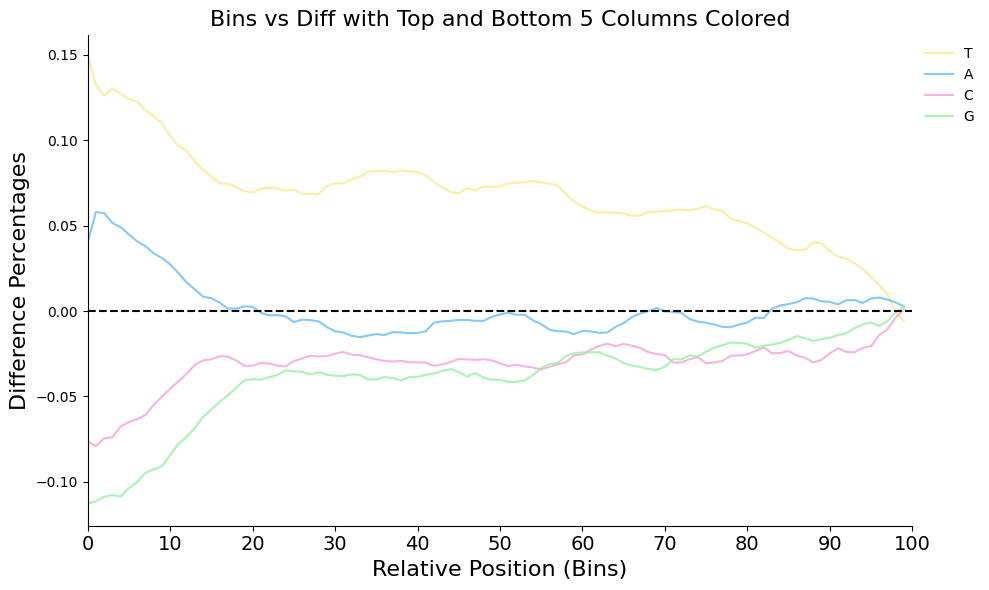

In [29]:
def plot_pointplot_with_top_bottom_colored(df):

    bin10_diff_map = df[df['bin'] == 10].set_index('column')['diff'].to_dict()

    df['bin10_diff'] = df['column'].map(bin10_diff_map)

    column_diff_means = df.groupby('column')['bin10_diff'].mean().sort_values(ascending=True)

    
    plt.figure(figsize=(10, 6))

    for i, col in enumerate(column_diff_means.index.unique()[::-1]):
        data_to_plot = df[df['column'] == col]
        color = 'grey'
        palette = ["#FDE98E","#67BBFC", "#F5A2D9", "#95F19E"]
            
        color = palette[i]
        sns.lineplot(x='bin', y='diff', data=data_to_plot, color=color, label=col if color != 'grey' else "", errorbar='ci', alpha=0.8 if color != 'grey' else 0.4, linewidth=1.5, markers='o', markersize=0 if color != 'grey' else 0)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    plt.title("Bins vs Diff with Top and Bottom 5 Columns Colored", fontsize=16)
    plt.xlabel("Relative Position (Bins)", fontsize=16)
    plt.ylabel("Difference Percentages", fontsize=16)

    plt.xticks(ticks=np.arange(0, 101, 10), labels=np.arange(0, 101, 10), fontsize=14)

    plt.xlim(0, 100)
    plt.tight_layout()
    plt.axhline(y=0, color='black', linestyle='--')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['top'].set_color('white')
    print (f"Y-axis limits: {df['diff'].min()} to {df['diff'].max()}")
    plt.show()

plot_pointplot_with_top_bottom_colored(summary_df_nucleotides_diff_smooth)

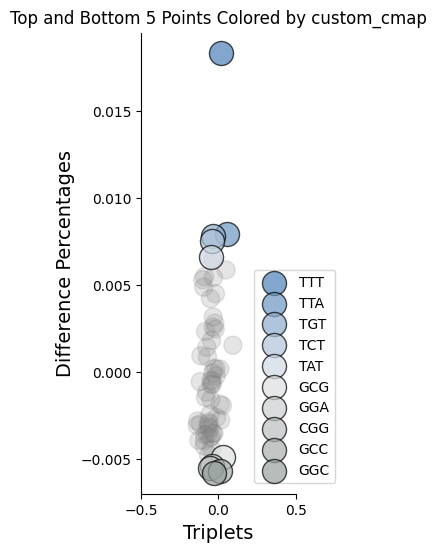

In [30]:
def plot_colored_pointplot(df, num_colored_points=5):
    df = df.copy()
    df["column_parsed"] = df["column"].str.split("_").str[1]
    
    df_sorted = df.sort_values(by='diff', ascending=False).reset_index(drop=True)

    colors = ['#97A19E', "#EFEFF0", '#4D81B7']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)    

    top_color_range = np.linspace(0.60, 1.0, num_colored_points)
    bottom_color_range = np.linspace(0.0, 0.40, num_colored_points)

    df_sorted['color'] = 'grey'
    top_indices = list(df_sorted.index[:num_colored_points])[::-1]
    bottom_indices = list(df_sorted.index[-num_colored_points:])[::-1]
    
    for i, idx in enumerate(top_indices):
        df_sorted.at[idx, 'color'] = cmap(top_color_range[i])
        
    for i, idx in enumerate(bottom_indices):
        df_sorted.at[idx, 'color'] = cmap(bottom_color_range[i])
    
    plt.figure(figsize=(2, 6))
    jitter_strength = 0.05
    df_sorted_with_jitter = df_sorted.copy()
    df_sorted_with_jitter["bin_with_jitter"] = df_sorted_with_jitter["bin"] + np.random.normal(-jitter_strength, jitter_strength, len(df_sorted_with_jitter))
    df_sorted_no_top_bottom = df_sorted_with_jitter[~df_sorted_with_jitter.index.isin(top_indices + bottom_indices)]
    
    sns.scatterplot(data=df_sorted_no_top_bottom, x='bin_with_jitter', y='diff', hue='color', palette=['grey'], legend=False, s=170, alpha=0.2, edgecolor=None)

    for idx in top_indices[::-1] + bottom_indices[::-1]:
        plt.scatter(df_sorted_with_jitter.loc[idx, 'bin_with_jitter'], df_sorted_with_jitter.loc[idx, 'diff'], 
                    color=df_sorted_with_jitter.loc[idx, 'color'], edgecolor="black", s=300, alpha=0.7, label=df_sorted_with_jitter.loc[idx, 'column_parsed'], )
    
    plt.xlabel("Triplets", fontsize=14)
    plt.ylabel('Difference Percentages', fontsize=14)
    plt.title(f'Top and Bottom {num_colored_points} Points Colored by {cmap.name}')

    plt.legend(loc='best', bbox_to_anchor=(1.3, 0.5))
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.xlim(-0.5, 0.5)
    
    plt.show()

plot_colored_pointplot(summary_df_triples_diff_smooth, num_colored_points=5)